# Общий взгляд на данные

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
dataset = pd.read_csv("analytics_test.csv")

In [70]:
dataset.head()

,Unnamed: 0,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
0,0,96422511,female,68,android,89656828,передачи о новых технологиях,show,share,6,playlist,0
1,1,45247030,male,62,android_tv,89784877,автопрому новости,news,search,0,NaN,0
2,2,79572413,male,12,web,10555855,логистическое законодательство,news,search,0,NaN,0
3,3,821317,female,58,android_tv,72054848,банковские премии новости,news,search,0,NaN,0
4,4,6206023,female,24,android,20838049,вики шоу аманда,show,subscribe,7,author,0


In [71]:
dataset.describe()

,Unnamed: 0,user_id,age,query_id,click_position,view_time
count,20000.000000,2.000000e+04,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,4.940472e+07,30.029600,1.629075e+08,6.216150,614.775450
std,5773.647028,2.896590e+07,22.588294,2.443505e+08,6.389262,2217.290922
min,0.000000,1.273000e+03,0.000000,8.758000e+03,0.000000,0.000000
25%,4999.750000,2.405560e+07,11.000000,3.215079e+07,0.000000,0.000000
50%,9999.500000,4.946180e+07,30.000000,6.425107e+07,4.000000,0.000000
75%,14999.250000,7.429182e+07,50.000000,9.664634e+07,10.000000,0.000000
max,19999.000000,9.999570e+07,69.000000,9.998612e+08,30.000000,17994.000000


Сбрасываем ненужную unnamed

In [72]:
dataset.drop(['Unnamed: 0'], inplace=True, axis=1)

Добавляем больше численных данных: из текста запроса получаем длину запроса и количество слов в нем

In [73]:
dataset["query_text_length"] =  dataset["query_text"].apply(len)
dataset["query_text_wordcount"] = dataset["query_text"].apply(lambda x: len(x.split()))

In [75]:
dataset.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,2.000000e+04,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.940472e+07,30.029600,1.629075e+08,6.216150,614.775450,25.839900,3.805000
std,2.896590e+07,22.588294,2.443505e+08,6.389262,2217.290922,7.284155,1.290526
min,1.273000e+03,0.000000,8.758000e+03,0.000000,0.000000,8.000000,1.000000
25%,2.405560e+07,11.000000,3.215079e+07,0.000000,0.000000,21.000000,3.000000
50%,4.946180e+07,30.000000,6.425107e+07,4.000000,0.000000,25.000000,4.000000
75%,7.429182e+07,50.000000,9.664634e+07,10.000000,0.000000,30.000000,4.000000
max,9.999570e+07,69.000000,9.998612e+08,30.000000,17994.000000,100.000000,20.000000


Предположим, сколько-то адекватные запросы можно формулировать начиная с 5 лет, отфильтруем age

In [145]:
dataset = dataset[dataset["age"] >= 5]

In [146]:
dataset.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,1.526700e+04,15267.000000,1.526700e+04,15267.000000,15267.000000,15267.000000,15267.000000
mean,4.929021e+07,39.339228,1.008937e+08,6.897950,435.466758,25.190149,3.685858
std,2.897877e+07,17.382840,1.754010e+08,6.693653,1730.117366,7.164282,1.297777
min,1.273000e+03,10.000000,1.146600e+04,0.000000,0.000000,8.000000,1.000000
25%,2.401440e+07,24.000000,2.793729e+07,0.000000,0.000000,20.000000,3.000000
50%,4.912038e+07,39.000000,5.583657e+07,6.000000,0.000000,25.000000,3.000000
75%,7.419500e+07,55.000000,8.360249e+07,11.000000,0.000000,29.000000,4.000000
max,9.999474e+07,69.000000,9.996379e+08,30.000000,17986.000000,100.000000,20.000000


In [147]:
dataset.dtypes

user_id                  int64
sex                     object
age                      int64
platform                object
query_id                 int64
query_text              object
query_type              object
event                   object
click_position           int64
doc_type                object
view_time                int64
query_text_length        int64
query_text_wordcount     int64
dtype: object

In [148]:
obj_cols = list(dataset.select_dtypes(include='object').columns)
obj_cols.remove("query_text")

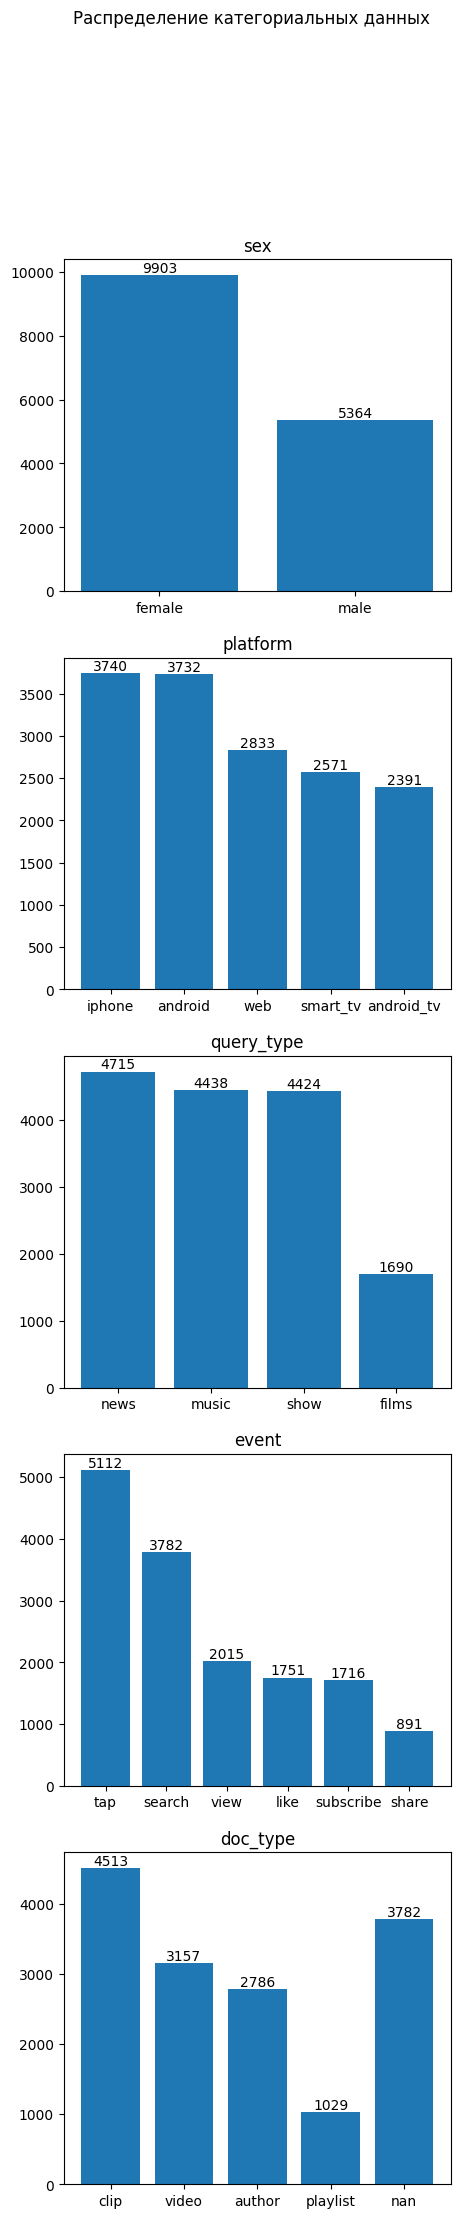

In [151]:
fig, axes = plt.subplots(len(obj_cols))
fig.set_size_inches(5, len(obj_cols) * 5)
fig.suptitle("Распределение категориальных данных")
for i, obj_col in enumerate(obj_cols):
    df = pd.DataFrame([dataset[obj_col].value_counts()])
    cols = list(df.columns)
    vals = [df[col].iloc[0] for col in cols]
    nan_num = dataset[obj_col].isna().sum()
    if nan_num > 0:
        cols.append("nan")
        vals.append(nan_num)
    bars_container = axes[i].bar(cols, vals)
    axes[i].set_title(f"{obj_col}")
    axes[i].bar_label(bars_container)

Убрав возраст <5, мы убрали всех анонимов, теперь пол конкретно определен у всех

Посмотрим, как следует интерпретировать nan в doc_type. Вряд ли это просто пропуски в данных, проверим, может ли это быть что ничего не выбрано при поиске

Проверим разброс категориальных данных по типам event

In [166]:
obj_cols_by_doctype = obj_cols.copy()
obj_cols_by_doctype.remove("doc_type")
# отфильтруем по доктайпам
doctypes = list(dataset["doc_type"].unique())
doctypes.remove(np.nan)
doctypes = np.array(doctypes)
obj_cols_by_doctype, doctypes

(['sex', 'platform', 'query_type', 'event'],
 array(['playlist', 'author', 'video', 'clip'], dtype='<U8'))

sex
playlist
['female', 'male']
[np.int64(626), np.int64(403)]
author
['female', 'male']
[np.int64(1810), np.int64(976)]
video
['female', 'male']
[np.int64(1994), np.int64(1163)]
clip
['female', 'male']
[np.int64(2973), np.int64(1540)]


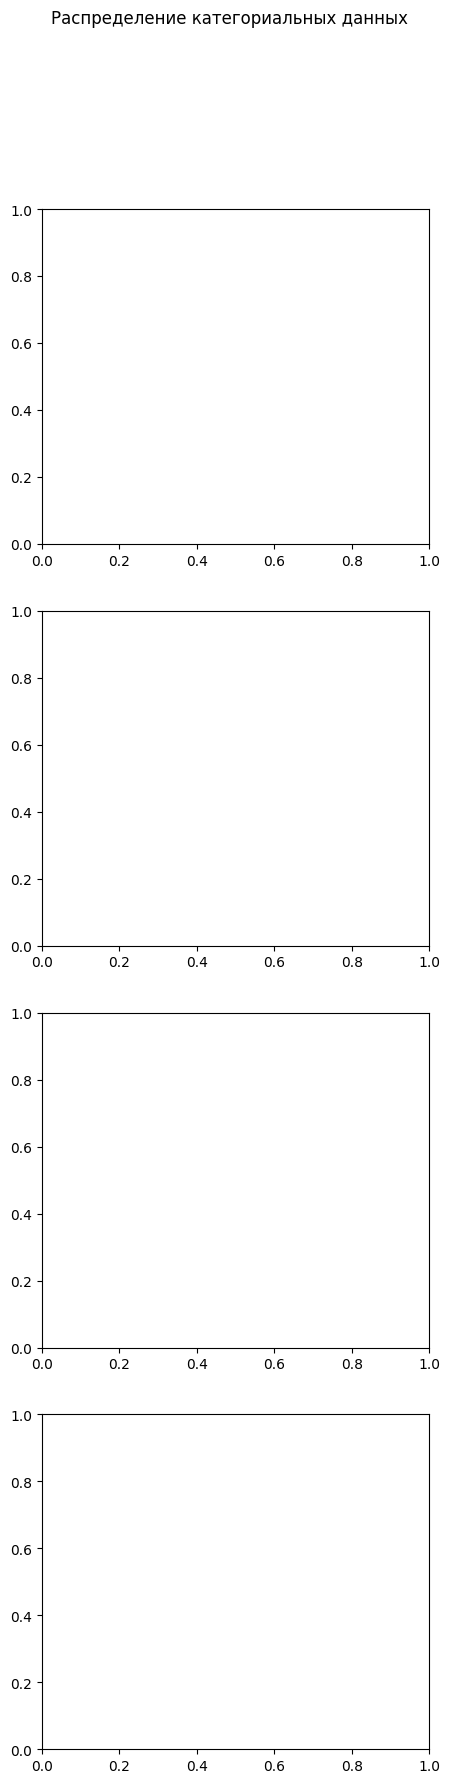

In [168]:
fig, axes = plt.subplots(len(obj_cols_by_doctype))
fig.set_size_inches(5, len(obj_cols_by_doctype) * 5)
fig.suptitle("Распределение категориальных данных")
for i, obj_col in enumerate(obj_cols_by_doctype):
    print(obj_col)
    d = {}
    # хотим построить диаграмму, в которой покажется количество категориальных объектов, но поделенных по доктайпам
    df = pd.DataFrame([dataset[obj_col].value_counts()])
    # тут у нас уникальные значения столбца obj_col
    
    # а тут сколько раз эти уникальные значения встречаются
    # print(cols)
    
    for doctype in doctypes:
        df = pd.DataFrame([dataset[dataset["doc_type"] == doctype] [obj_col].value_counts()])
        cols = list(df.columns)
        print(doctype)
        print(cols)
        vals = [df[col].iloc[0] for col in cols]
        print(vals)
        # d[doctype] = [dataset[dataset ]  ]
    break
        # bottom = np.zeros()
    # df = pd.DataFrame([dataset[obj_col].value_counts()])
    # cols = list(df.columns)
    # vals = [df[col].iloc[0] for col in cols]
    # nan_num = dataset[obj_col].isna().sum()
    # if nan_num > 0:
    #     cols.append("nan")
    #     vals.append(nan_num)
    # bars_container = axes[i].bar(cols, vals)
    # axes[i].set_title(f"{obj_col}")
    # axes[i].bar_label(bars_container)

In [ ]:
species = ('Adelie', 'Chinstrap', 'Gentoo')
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

надо еще посмотреть, как успешно классифицируется запрос по категориям
Успешно то есть насколько он релевантен

Теперь смотрим на разброс данных по категориям (objects)

In [102]:
df = pd.DataFrame([ dataset.platform.value_counts()])

[(col,df[col].iloc[0] ) for col in df.columns ]

[('iphone', np.int64(4312)),
 ('smart_tv', np.int64(4255)),
 ('android', np.int64(4246)),
 ('android_tv', np.int64(3985)),
 ('web', np.int64(3202))]

In [84]:
un_platforms_x = dataset.platform.unique()

In [87]:
[dataset[dataset["platform"] == un_platforms[i]].shape[0] for i in range(un_platforms.size)]

[4246, 3985, 3202, 4255, 4312]

In [18]:
dataset.platform.isna().sum()

np.int64(0)

In [17]:
dataset.doc_type.value_counts()

doc_type
clip        5195
video       4704
author      3357
playlist    1786
Name: count, dtype: int64

In [19]:
dataset.doc_type.isna().sum()

np.int64(4958)

In [22]:
dataset.query_type.value_counts()

query_type
show     5000
news     5000
music    5000
films    5000
Name: count, dtype: int64

In [21]:
dataset.query_type.isna().sum()

np.int64(0)

In [23]:
dataset.view_time.value_counts()

view_time
0        17083
933          5
479          5
287          4
183          4
         ...  
1570         1
54           1
10600        1
4692         1
2812         1
Name: count, Length: 2427, dtype: int64

In [25]:
dataset.view_time.isna().sum()

np.int64(0)

In [41]:
dataset.sex.value_counts()

sex
female    10075
male       5446
anonym     4479
Name: count, dtype: int64

Смотрим, повторяются ли юзеры и айдишники запросов

In [27]:
dataset.user_id.nunique(), dataset.user_id.count()

(16292, np.int64(20000))

In [28]:
dataset.query_id.nunique(), dataset.query_id.count()

(18430, np.int64(20000))

In [62]:
dataset.event.value_counts()

event
tap          6564
search       4958
view         2917
like         2195
subscribe    2142
share        1224
Name: count, dtype: int64

У нас не NLP, так что оценивать текст запроса как набор слов мы не можем. Добавим данные о числе слов и длине запроса

In [36]:
dataset["query_text_wordcount"] = dataset["query_text"].apply(lambda x: len(x.split()))

In [37]:
dataset.head()

,Unnamed: 0,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time,query_text_length,query_text_wordcount
0,0,96422511,female,68,android,89656828,передачи о новых технологиях,show,share,6,playlist,0,28,4
1,1,45247030,male,62,android_tv,89784877,автопрому новости,news,search,0,NaN,0,17,2
2,2,79572413,male,12,web,10555855,логистическое законодательство,news,search,0,NaN,0,30,2
3,3,821317,female,58,android_tv,72054848,банковские премии новости,news,search,0,NaN,0,25,3
4,4,6206023,female,24,android,20838049,вики шоу аманда,show,subscribe,7,author,0,15,3


Посмотрим, как раскиданы числовые данные

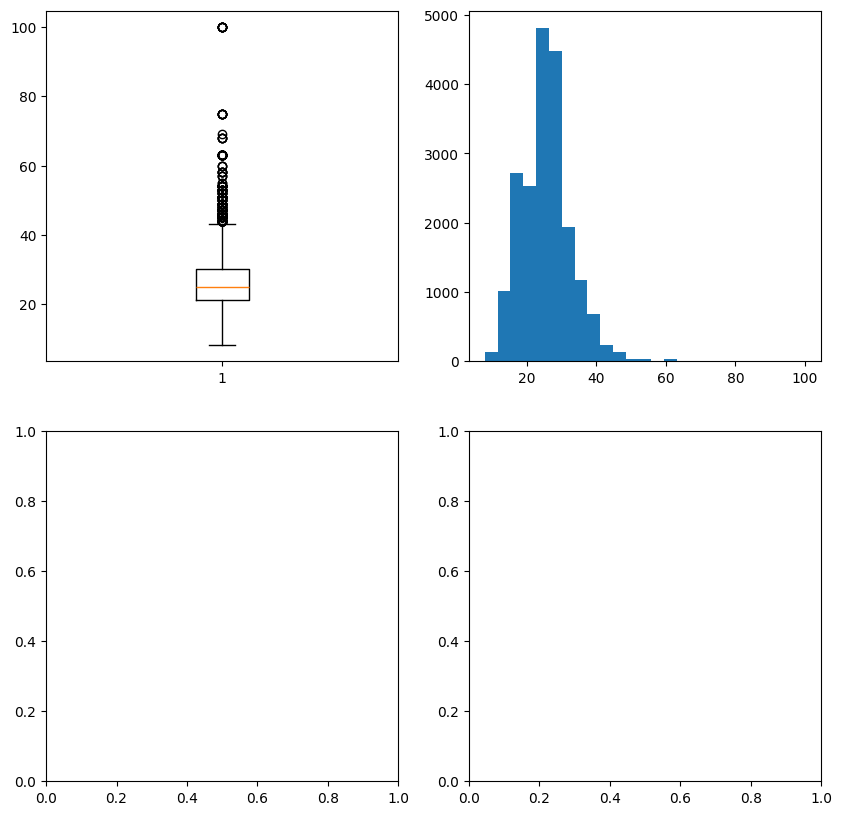

In [64]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches((10, 10))
axs[0][0].boxplot(dataset["query_text_length"])
axs[0][1].hist(dataset["query_text_length"], bins=25) #boxplot(dataset["query_text_wordcount"])
# axs[1][0].boxplot(dataset["click_position"])
# axs[1][1].boxplot(dataset["view_time"])
plt.show()

Ищем
- насколько мы упрощаем жизнь
- когда пользователю предлагается релевантный ответ
- какой вклад от поиска в развитие ВК

Что такое релеватный ответ?

Что такое плохое качество? когда не релевантный ответ

Когда нерелевантный? когда видео находят далеко или не выбирают (0)

Надо посмотреть, сколько по каждому запросу совершено действий

На какие категории будем делить (где конкретно проблемы)? Проблема с платформой? С полом? 

## Точки роста: когда плохое качество

## Визуализируем проблемные случаи

## Выводы